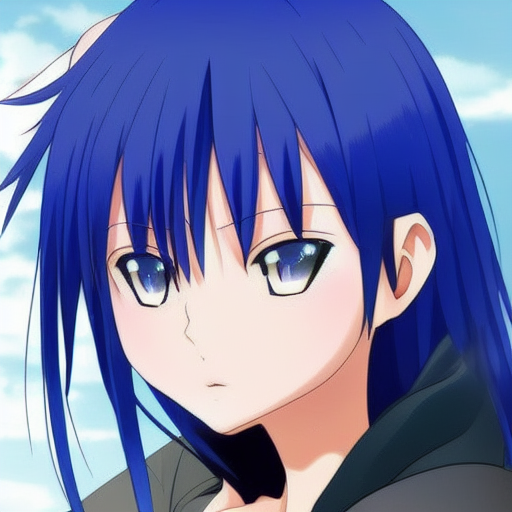

In [24]:
import webuiapi

# create API client
api = webuiapi.WebUIApi()

# create API client with custom host, port
api = webuiapi.WebUIApi(host='10.8.76.222', port=7860)

# create API client with custom host, port and https
#api = webuiapi.WebUIApi(host='webui.example.com', port=443, use_https=True)

# create API client with default sampler, steps.
#api = webuiapi.WebUIApi(sampler='Euler a', steps=20)

# optionally set username, password when --api-auth=username:password is set on webui.
# username, password are not protected and can be derived easily if the communication channel is not encrypted.
# you can also pass username, password to the WebUIApi constructor.
# api.set_auth('username', 'password')
result1 = api.txt2img(prompt="anime,face,beautiful,master peice",
                    negative_prompt="ugly, out of frame",
                    # seed=1003,
                    styles=["anime"],
                    cfg_scale=7,
#                      sampler_index='DDIM',
#                      steps=30,
#                      enable_hr=True,
#                      hr_scale=2,
#                      hr_upscaler=webuiapi.HiResUpscaler.Latent,
#                      hr_second_pass_steps=20,
#                      hr_resize_x=1536,
#                      hr_resize_y=1024,
#                      denoising_strength=0.4,

                    )
# images contains the returned images (PIL images)
result1.images

# image is shorthand for images[0]
result1.image

# info contains text info about the api call
result1.info

# info contains paramteres of the api call
result1.parameters


result1.image

In [39]:
import cv2
img = cv2.imread('test.png')

# img2img with multiple ControlNets (used 1.0 but also supports 1.1)
unit1 = webuiapi.ControlNetUnit(input_image=img, module='canny', model='control_canny-fp16 [e3fe7712]')
unit2 = webuiapi.ControlNetUnit(input_image=img, module='depth', model='control_depth-fp16 [400750f6]', weight=0.5)

r2 = api.img2img(prompt="girl",
            images=[img], 
            width=512,
            height=512,
            controlnet_units=[unit1, unit2],
            sampler_name="Euler a",
            cfg_scale=7,
           )
r2.image

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [49]:
# txt2img with ControlNet (used 1.0 but also supports 1.1)
import cv2
import base64
from PIL import Image

img = cv2.imread('test.png')

# Encode into PNG and send to ControlNet
# retval, bytes = cv2.imencode('.png', img)

# numpy_imageはnumpy.ndarray型の画像データを示します
pil_image = Image.fromarray(img)
# encoded_image = base64.b64encode(bytes).decode('utf-8')
unit1 = webuiapi.ControlNetUnit(input_image=pil_image, module='openpose_faceonly', model='control_v11p_sd15_openpose [cab727d4]')

r = api.txt2img(prompt="anime face",cfg_scale=7, controlnet_units=[unit1])

WebUIApiResult(images=[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F7728D1E190>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F7728D1E400>], parameters={'enable_hr': False, 'denoising_strength': 0.7, 'firstphase_width': 0, 'firstphase_height': 0, 'hr_scale': 2.0, 'hr_upscaler': 'Latent', 'hr_second_pass_steps': 0, 'hr_resize_x': 0, 'hr_resize_y': 0, 'hr_sampler_name': None, 'hr_prompt': '', 'hr_negative_prompt': '', 'prompt': 'anime face', 'styles': [], 'seed': -1, 'subseed': -1, 'subseed_strength': 0.0, 'seed_resize_from_h': 0, 'seed_resize_from_w': 0, 'sampler_name': 'Euler a', 'batch_size': 1, 'n_iter': 1, 'steps': 20, 'cfg_scale': 7.0, 'width': 512, 'height': 512, 'restore_faces': False, 'tiling': False, 'do_not_save_samples': False, 'do_not_save_grid': False, 'negative_prompt': '', 'eta': 1.0, 's_min_uncond': 0.0, 's_churn': 0.0, 's_tmax': 0.0, 's_tmin': 0.0, 's_noise': 1.0, 'override_settings': {}, 'override_settings_restore_afterwards

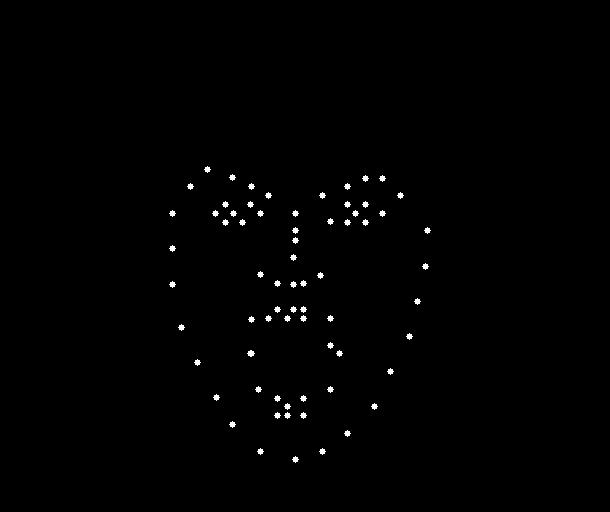

In [65]:
r = api.controlnet_detect(images=[pil_image], module='openpose_faceonly')
r.image

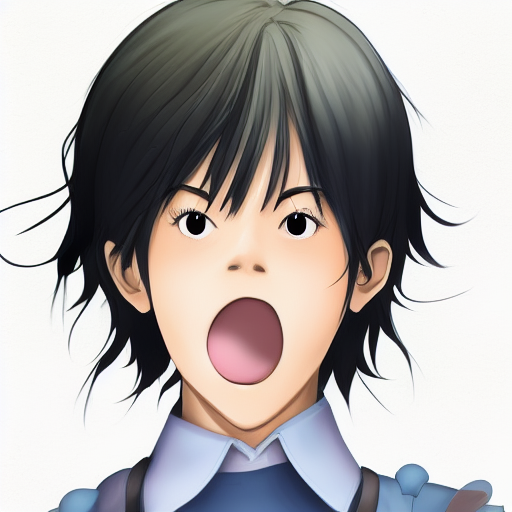

In [51]:
r.image

In [35]:
# txt2img with ControlNet (used 1.0 but also supports 1.1)
import cv2
import base64

img = cv2.imread('test.png')

# Encode into PNG and send to ControlNet
# retval, bytes = cv2.imencode('.png', img)
# encoded_image = base64.b64encode(bytes).decode('utf-8')
unit1 = webuiapi.ControlNetUnit(input_image=img, module='openpose_faceonly', model='control_v11p_sd15_openpose [cab727d4]')
# unit1.json()
r = api.txt2img(prompt="photo of a beautiful girl", controlnet_units=[unit1])
# r.image

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
api.controlnet_model_list()

['control_canny-fp16 [e3fe7712]',
 'control_depth-fp16 [400750f6]',
 'control_hed-fp16 [13fee50b]',
 'control_mlsd-fp16 [e3705cfa]',
 'control_normal-fp16 [63f96f7c]',
 'control_openpose-fp16 [9ca67cc5]',
 'control_scribble-fp16 [c508311e]',
 'control_seg-fp16 [b9c1cc12]',
 'control_v11p_sd15_openpose [cab727d4]',
 't2iadapter_canny-fp16 [f2e7f7cd]',
 't2iadapter_color-fp16 [743b5c62]',
 't2iadapter_depth-fp16 [2c829a81]',
 't2iadapter_keypose-fp16 [e3943bb9]',
 't2iadapter_openpose-fp16 [4286314e]',
 't2iadapter_seg-fp16 [0e677718]',
 't2iadapter_sketch-fp16 [75b15924]',
 't2iadapter_style-fp16 [0e2e8330]']